In [1]:
import networkx as nx
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

from scipy.stats import binom

# Directed Graphs

In [2]:
G = nx.DiGraph()
G.add_edge('a','b')
G.add_edge('a','c')
G.add_edge('b','c')
G.add_edge('a','d')

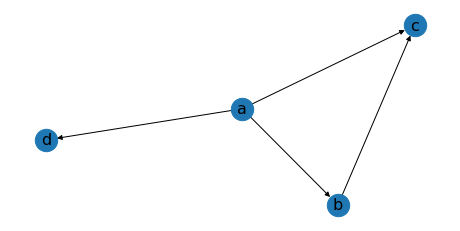

In [3]:
plt.figure(figsize = (8,4))
nx.draw_networkx(G, with_labels = True, node_size=500, font_size=16, width=1) 
plt.axis('off');

Can have edges in both directions

In [4]:
G.add_edge('c','a')

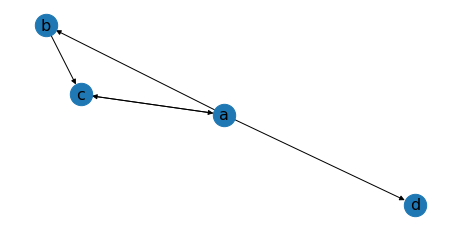

In [5]:
plt.figure(figsize = (8,4))
nx.draw_networkx(G, with_labels = True, node_size=500, font_size=16, width=1) 
plt.axis('off');

In [6]:
# In Degree of nodes
kin = np.array(list(dict(G.in_degree).items()))
print('In Degrees: \n',kin)

# Out Degree of nodes
kout = np.array(list(dict(G.out_degree).items()))
print('\n Out Degrees: \n',kout)

In Degrees: 
 [['a' '1']
 ['b' '1']
 ['c' '2']
 ['d' '1']]

 Out Degrees: 
 [['a' '3']
 ['b' '1']
 ['c' '1']
 ['d' '0']]


## Random Directed Graphs

### Growing network directed graph
- Add nodes one at a time
- For each new node, choose a target randomly from existing nodes with probability based on their degree

In [7]:
G = nx.gn_graph(n=10)

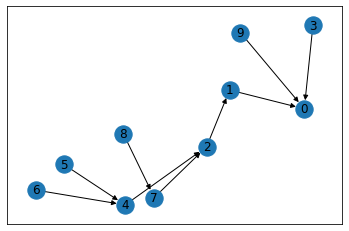

In [8]:
pos = nx.layout.spring_layout(G)
nx.draw_networkx(G, pos = pos)

### Erdos Renyi random directed graph
- Add nodes one at a time
- For each new node, choose a target node uniformly at randomly from existing nodes
- With probability p, the direction of the edge can be reversed

In [27]:
N = 100
av_degree = 8
p = av_degree/(N-1)
G = nx.gnp_random_graph(N, p, seed=None, directed=True)

In [30]:
print(nx.to_numpy_matrix(G))

[[0. 1. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

Number of nodes: 100
Number of edges: 798


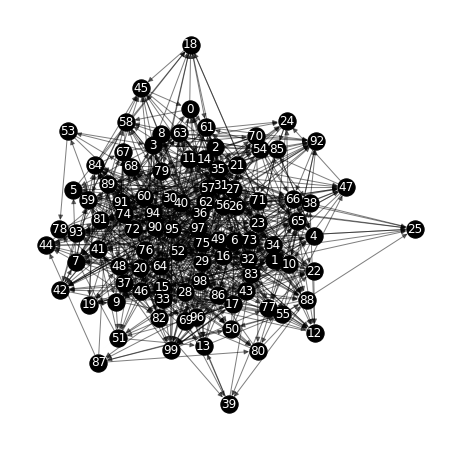

In [11]:
pos = nx.fruchterman_reingold_layout(G);
plt.figure(figsize=(8,8));
plt.axis("off");
nx.draw_networkx_nodes(G, pos, node_size=300, node_color="black");
nx.draw_networkx_edges(G, pos, alpha=0.500);
nx.draw_networkx_labels(G, pos, font_color="white");
plt.show();

In [12]:
def in_degree_distribution(GER):
    vk = dict(GER.in_degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    mink = np.min(min)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

def out_degree_distribution(GER):
    vk = dict(GER.out_degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    mink = np.min(min)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

def degree_distribution(GER):
    vk = dict(GER.degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    mink = np.min(min)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

In [13]:
ks, Pk = degree_distribution(G)
in_ks, in_Pk = in_degree_distribution(G)
out_ks, out_Pk = out_degree_distribution(G)

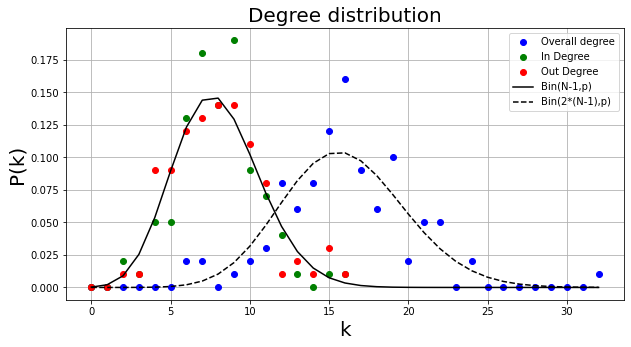

In [14]:
plt.figure(figsize=(10,5))
plt.plot(ks,Pk,'bo', label='Overall degree')
plt.plot(in_ks,in_Pk,'go', label='In Degree')
plt.plot(out_ks,out_Pk,'ro', label='Out Degree')

pk = binom.pmf(ks, N-1, p)
plt.plot(ks, pk, 'k', label='Bin(N-1,p)')

pk2 = binom.pmf(ks, 2*(N-1), p)
plt.plot(ks, pk2, 'k--', label='Bin(2*(N-1),p)')

plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.grid(True)
plt.legend()

# Trophic Analysis of Networks
## How directed is a directed network?
https://royalsocietypublishing.org/doi/pdf/10.1098/rsos.201138

For a weakly connected graph G with non-negative edge weight matrix W, define:
- $u_n = \sum_{m} w_{m,n} + \sum_{m} w_{n,m}$ the total weight of node n
- $v_n = \sum_{m} w_{m,n} - \sum_{m} w_{n,m}$ the weight imbalance of node n
- $\Lambda = diag(u) - W - W^T$  the symmetrised graph Laplacian

The trophic levels of the nodes of G are given by the vector $h$ that solves $\Lambda h = v$

The Trophic Incoherence of the graph G is then 
$F_0 = \frac{\sum_{m,n} w_{m n}(h_n -h_m-1)^2}{\sum_{m,n} w_{m n}}$

$F_0 = 0$ is maximal coherence whereas $F_0 = 1$ is maximal incoherence.

Alternative measure for the Trophic Incoherence is $\eta = \frac{\sigma_z}{\bar{z}} = \sqrt{\frac{F_0}{1-F_0}}$ 

where $\sigma_z$ is the standard deviation of level differences and $\bar{z}$ is their edge-weighted mean.

*Adapted from code by Niall Rodgers, University of Birmingham

In [15]:
def get_levels(W): # input graph edge weight matrix W
    w_in = W.sum(axis=0) # sum over rows
    w_out= W.sum(axis=1) # sum over columns
    u = w_in + w_out
    v = w_in - w_out

    diag_u = np.diag(u)
    Lambda = diag_u - (W + W.T)
    
    #Setting zero of here so that the system of equations is soluble 
    Lambda[0,0] = 0
    h = scipy.linalg.solve(Lambda, v)
    h = h - min(h)
    
    return(h)

In [16]:
# extract largest connected component of graph
def extract_connected(G): # input adjacency matrix
    largest_cc = max(nx.weakly_connected_components(G), key=len)
    G2 = G.subgraph(largest_cc)
    
    if len(G)==len(G2):
        print('The Graph was already at least weakly connected')     
    else:
        print('Warning: The disconnected parts have been removed')
        print('The Original graph had ' + str(len(G)) + ' nodes')
        print('The Subgraph has ' + str(len(G)) + 'nodes')
    
    return(G2)

In [17]:
def calc_troph_incoh(W,h):
    edgelist = np.array(np.nonzero(W)).T
    edgelist = edgelist.astype(int)
    
    # normalizing factor (the denominator)
    L = np.sum(W) 
    
    # level differences between target and source nodes
    z = h[(edgelist[:,1])] - h[(edgelist[:,0])] 
    
    w_flat = W[edgelist[:,0],edgelist[:,1]]
    F = np.sum(w_flat*((z-1)**2))/L
    eta = np.sqrt(F/(1-F))
    etacheck = (np.sqrt(np.var(z))/np.average(z))
    
    if (np.abs(eta - etacheck))>0.0001:
        print('Warning:Eta is differnt when calculated in two different ways there must be an error')
    
    print('The Trophic Incohernce is '+ str(F))
    print('The Eta is  '+ str(eta))
    
    return(F, eta)

In [18]:
G = extract_connected(G)
W = nx.to_numpy_array(G)
h = get_levels(W)

F, eta = calc_troph_incoh(W,h)

The Graph was already at least weakly connected
The Trophic Incohernce is 0.9108659910618048
The Eta is  3.1967268115304295


In [19]:
troph_positions = {}
for i in range (len(h)):
    troph_positions[i]= [np.random.random(),h[i]]

pos = troph_positions

([], [])

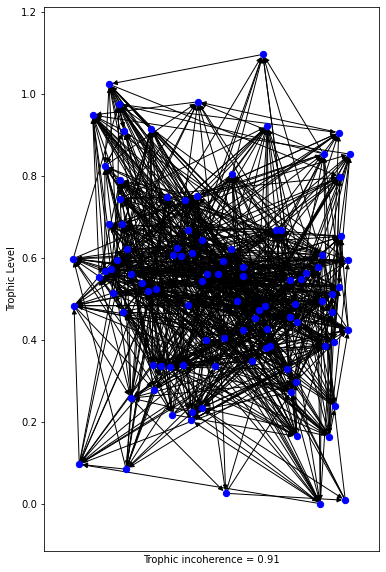

In [20]:
fig, ax = plt.subplots(figsize=(6, 10))

#networkx drawing call 
nx.draw(G, pos, node_size=40, node_color='b', ax=ax)

# turn the axis on
ax.set_axis_on()
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.ylabel('Trophic Level')
plt.xlabel('Trophic incoherence = ' + "{:.2f}".format(F))
ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.xticks([], [])

# Sample Real-World Networks
Available in Network_Data folder

Some examples to try:
- net_celegans_neural.dat in Neural
- Ythan96.dat in FoodWebs
- net_e_coli.dat in Genetic
- net_moreno_highschool.dat in Social

In [21]:
# edgelist=np.loadtxt('Network_Data/FoodWebs/Ythan96.dat')
edgelist=np.loadtxt('Network_Data/Neural/net_celegans_neural.dat')
# edgelist=np.loadtxt('Network_Data/Genetic/net_e_coli.dat')
# edgelist=np.loadtxt('Network_Data/Social/net_moreno_highschool.dat')

OSError: Network_Data/Neural/net_celegans_neural.dat not found.

In [ ]:
graph = nx.DiGraph()
graph.add_edges_from(edgelist)

In [ ]:
nx.draw_networkx(graph,with_labels=False,node_size=40)

In [ ]:
G = extract_connected(graph)
nodes = np.sort(list(G.nodes))
W = nx.to_numpy_array(G)
h = get_levels(W)
F, eta = calc_troph_incoh(W,h)

In [ ]:
troph_positions = {}
for i in range (len(h)):
    troph_positions[nodes[i]]= [np.random.random(),h[i]]

pos = troph_positions

In [ ]:
fig, ax = plt.subplots(figsize=(6, 10))

#networkx drawing call 
nx.draw(G, pos, node_size=40, node_color='b', ax=ax)

# turn the axis on
ax.set_axis_on()
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.ylabel('Trophic Level')
plt.xlabel('Trophic incoherence = ' + "{:.2f}".format(F))
ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.xticks([], [])